Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introdução a teoria das vibrações


 ##                                                              Trabalho 2.2




### Aluno: Daniel Barbosa Mapurunga Matos
### Matrícula: 00312265

[1.Frequência Naturais e modos de vibração](#section_1)  
[2.Resposta da estrutura a uma velocidade inicial](#section_2)  
[3. Amortecimento em múltiplos graus de liberdade](#section_3)  
 
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sc


import pickle as pk

with open('data/sample_KM.pk', 'rb') as target:
    K1, M1,= pk.load(target)


## 1. Frequências naturais e modos de vibração<a name="section_1"></a> 

A partir das matrizes de rigidez e de massa, a partir da resolução de um problema de autovalores e autovetores, é possível determinar as frequências naturais de vibração e os modos de vibração, utilizando a biblioteca scipy.






In [2]:
# Uses scipy to solve the standard eigenvalue problem
w21, Phi1 = sc.eig(K1, M1)

# Ensure ascending order of eigenvalues
iw   = w21.argsort()
w21  = w21[iw]
Phi1 = Phi1[:,iw]

# Eigenvalues to vibration frequencies
wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/2/np.pi


Visualizando os 4 primeiros modos de vibração e suas respectivas freqûencias naturais


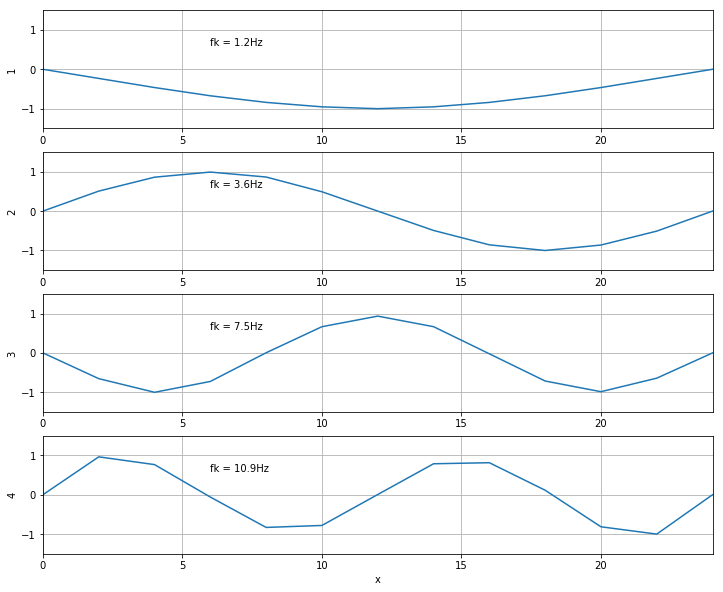

In [3]:
plt.figure(1, figsize=(12,10))
x = np.arange(0, 26, 2)

for k in range(4):
    pk = np.zeros(13)
    pk[1:-1] = Phi1[:,k]
    pk /= np.max(np.abs(pk))   # ajustando escala para amplitude unitária
    
    plt.subplot(4,1,k+1)
    plt.plot(x, pk)
    
    plt.xlim( 0.0, 24.0);
    plt.ylim(-1.5,  1.5);  plt.ylabel(str(k+1));
    plt.text(6, 0.6, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

plt.xlabel('x');


## 2. Resposta da estrutura a uma velocidade inicial<a name="section_2"></a> 

Considerando uma força de 50 kN que atue durante um intervalo   $ td = Tn/4 $, onde Tn é o menor período relacionadas as frequências naturais de vibração da estrutura, Pode-se utilizar o artifício da resposta impulsiva, ou seja, considerar o impulso como uma velocidade inicial na estrutura.

A partir destas informações, é possível montar o vetor velocidade inicial, como mostrado no código abaixo:


In [4]:
fmax = np.max(fk1)
print(fmax)
Fa = 50000
Tn = 1/fmax
td = Tn/4
m = 3000
vo = Fa*td/m
print(vo)

vo_v=[0, 0 , 0, 0, vo, 0, 0, 0, 0, 0, 0]

uo_v =np.zeros(11)


31.735065037298668
0.13129535615476207


A partir do sistema de equações formado pelas equações abaixo, é possível calcular os ângulos de fase e as amplitudes para os nós. Como o deslocamento inicial é nulo, o angulo será sempre $ \dfrac{-\pi}{2} $


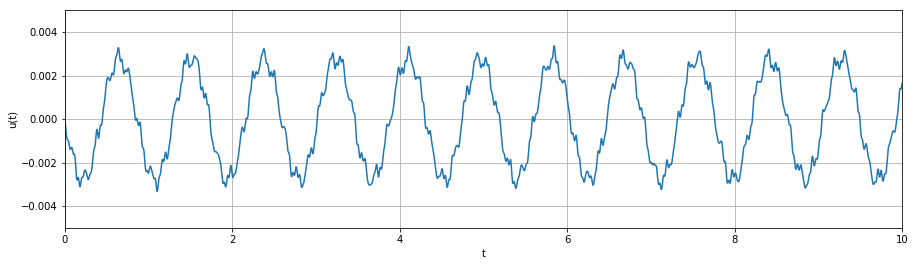

In [5]:
Phit = Phi1
for k in range(11):

    Phit[k] = Phi1[k].transpose() #calculando as transpostas dos autovalores
    

xi =  np.pi/2
UMAX =np.zeros(11)

for k in range (11):
    Mi=np.dot(np.dot(Phit[k], M1), Phi1[k])
    umax = (np.dot(np.dot(Phit[k], M1),vo_v)) /  (wk1[k] * np.sin(xi)* Mi) #calculo das amplitudes máximas
   
    UMAX[k]=umax
    


t = np.linspace(0,10,10000)   #vetor representando o tempo.
uk = np.zeros((11, 10000))    # criando uma matriz 11x100 para receber os valores de deslocamentos

for k in range(11):
    
            uk[k,:] = UMAX[k]*np.cos(-wk1[k]*t - np.pi/2)
 
u = np.dot(Phi1, uk)  #produto dos autovalores pela matriz de deslocamentos

plt.figure(2, figsize=(15,4))
plt.plot(t,u[5,:]) #plotando o 6 nó (maiores deslocamentos)
plt.xlim( 0.0, 10.0); plt.xlabel("t");
plt.ylim(-0.005,0.005);  plt.ylabel("u(t)");
plt.grid(True)
 


    




## 3. Amortecimento em múltiplos graus de liberdade <a name="section_3"></a> 

Para o cálculo do amortecimento, utilizou-se o método de Rayleigh, onde a matriz de amortecimento é uma combinação linear das matrizes de massa e rigidez.



In [17]:
zeta =np.zeros(11)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]* wk1[0]-zeta[1]*wk1[1])/(wk1[0]**2-wk1[1]**2)
alfa0 = 2*zeta[0]*wk1[0]-alfa1*wk1[1]**2

for k in range (9):
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)

print(zeta)

[0.01       0.01       0.01366369 0.02147906 0.03170421 0.03581963
 0.04443194 0.04783054 0.05602077 0.06310794 0.06630718]
